<a href="https://colab.research.google.com/github/KuanChihLee/Supervised-Learning/blob/master/Assignment2_Extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Question 4

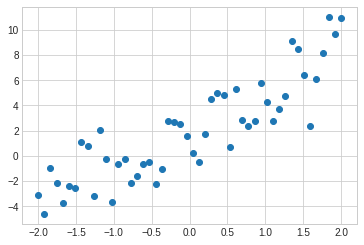

In [0]:
## Creating data required in question 5
SampleNum = 50
Slope = 3
Intercept = 2
Mean = 0
Std = 2
#rng = np.random.RandomState(42)
#x = 10 * rng.rand(S_Num)
es = np.random.normal(Mean, Std, SampleNum)
x = np.linspace(-2, 2, SampleNum)
y = Slope * x + Intercept + es
plt.scatter(x, y)

In [0]:
import pandas as pd
from random import shuffle
from math import sqrt, ceil, floor
from numpy.linalg import inv

def LS_AnalyticalSolu(x, y):
    theta = np.round(np.dot(inv(x.T.dot(x)).dot(x.T), y), 10)
    
    return theta


def Rid_AnalyticalSolu_L2(x, y, lamda):
    N, P = x.shape
    Identity = np.identity(P)
    ## Very important!! We don't add penalty to Intercept
    Identity[0,0] = 0
    theta = np.round(np.dot(inv(x.T.dot(x) + lamda*Identity).dot(x.T), y), 10)
    
    return theta


def Lasso_AnalyticalSolu_L1(x, y, theta, lamda):
    N, P = x.shape
    diag_theta = np.zeros(P)
    for ele in range(len(theta)):
        if theta[ele] != 0:
            diag_theta[ele] = 1 / abs(theta[ele])
        else:
            diag_theta[ele] = 0
    diag_theta[0] = 0
    theta = np.round(np.dot(inv(x.T.dot(x)/N + lamda*np.diag(diag_theta)).dot(x.T), y)/N, 10)
    
    return theta


def LS_MSE_Loss(x, y, theta):
    N, P = x.shape
    grad = np.zeros(P)
    
    err = x.dot(theta) - y 
    L = (sum(err ** 2.0)) / (2.0*N)
    grad = np.round((2.0*x.T.dot(err)) / (2.0*N), 10)
   
    return L, grad
    

def Rid_MSE_Loss(x, y, theta, lamda):
    N, P = x.shape
    grad = np.zeros(P)
    
    err = x.dot(theta) - y 
    L2_norm = lamda * np.dot(theta.T, theta)
    L = (sum(err ** 2.0) + L2_norm) / (2.0*N)
    grad = np.round((x.T.dot(err) + lamda*theta) / N, 10)
   
    return L, grad
    
    
def Lasso_MSE_Loss(x, y, theta, lamda):
    N, P = x.shape
    grad = np.zeros(P)
    
    err = x.dot(theta) - y 
    L1_norm = sum(abs(theta * lamda))
    L = (sum(err ** 2.0) + L1_norm) / (2.0*N)
    grad = Lasso_AnalyticalSolu_L1(x, y, theta, lamda)

    return L, grad


def Optimizer_func(x, y, lr, theta, max_iter, reg = "LS", lamda = 0):
    N, P = x.shape
    order = np.array(range(N))
    x_shuffle = np.zeros((1,P))
    
    for i in range(max_iter):
        x_input = x.values
        if reg == "lasso":
            J, grad = Lasso_MSE_Loss(x_input, y, theta, lamda)
            theta = grad
        elif reg == "ridge":
            J, grad = Rid_MSE_Loss(x_input, y, theta, lamda)
            theta -= lr*grad
        else:
            J, grad = LS_MSE_Loss(x_input, y, theta)
            theta -= lr*grad
        
    return theta


def Create_predictors(x, NumberOfPredictor):
    X = pd.DataFrame({'Inter': np.ones(len(x))})
    for degree in range(NumberOfPredictor):
        name = "Degree_" + str(degree+1)
        X[name] = pow(x, degree+1)
        
    return X

In [0]:
NumberOfPredictor = 5
X = Create_predictors(x, NumberOfPredictor)
X.head()

,Inter,Degree_1,Degree_2,Degree_3,Degree_4,Degree_5
0,1.0,-2.000000,4.000000,-8.000000,16.000000,-32.000000
1,1.0,-1.918367,3.680133,-7.059848,13.543381,-25.981180
2,1.0,-1.836735,3.373594,-6.196398,11.381139,-20.904132
3,1.0,-1.755102,3.080383,-5.406387,9.488760,-16.653743
4,1.0,-1.673469,2.800500,-4.686551,7.842799,-13.124684


### OLS Analytical Solution- Question 4(a)(b)(i)

In [0]:
theta_ols  = LS_AnalyticalSolu(X, y)
print("parameters:\n" + "Intercept: " + str(theta_ols[0]))
for degree in range(NumberOfPredictor):
    print("Degree_" + str(degree+1) + ": " + str(theta_ols[degree+1]))
yhat_ols = X.dot(theta_ols)
print("Predicted MSE: ", sum((y - yhat_ols) ** 2)/(2*SampleNum))

parameters:
Intercept: 2.2436966072
Degree_1: 0.7776867138
Degree_2: -0.6947904786
Degree_3: 2.5295307459
Degree_4: 0.2931163813
Degree_5: -0.495109105
Predicted MSE:  1.106505750014385


### Sklearn OLS Analytical Solution

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(X,y)
print("Intercept: ", model.intercept_)
theta_ols2 = np.zeros(NumberOfPredictor+1)
theta_ols2[0] = model.intercept_
for degree in range(NumberOfPredictor):
    print("Degree_" + str(degree+1) + ": " + str(model.coef_[degree+1]))
    theta_ols2[degree+1] = model.coef_[degree+1]
yhat_ols2 = X.dot(theta_ols2)
print("Predicted MSE: ", sum((y - yhat_ols2) ** 2)/(2*SampleNum))

Intercept:  2.243696607158719
Degree_1: 0.7776867138222237
Degree_2: -0.6947904786457423
Degree_3: 2.529530745863878
Degree_4: 0.2931163813136684
Degree_5: -0.4951091049956058
Predicted MSE:  1.106505750014385


### Ridge Analytical Solution- - Question 4(a)(b)(ii)

In [0]:
lamda = 5
theta_rid  = Rid_AnalyticalSolu_L2(X, y, lamda)
print("parameters:\n" + "Intercept: " + str(theta_rid[0]))
for degree in range(NumberOfPredictor):
    print("Degree_" + str(degree+1) + ": " + str(theta_rid[degree+1]))   
yhat_rid = X.dot(theta_rid)
print("Predicted MSE: ", sum((y - yhat_rid) ** 2)/(2*SampleNum))

parameters:
Intercept: 2.0825872476
Degree_1: 1.2427015284
Degree_2: -0.3621460119
Degree_3: 1.7581640092
Degree_4: 0.2063789515
Degree_5: -0.310215767
Predicted MSE:  1.1552076544660015


### Sklearn Ridge Analytical Solution

In [0]:
from sklearn.linear_model import Ridge
model = Ridge(fit_intercept = True, alpha = 5)
model.fit(X,y)
print("Intercept: ", model.intercept_)
theta_rid2 = np.zeros(NumberOfPredictor+1)
theta_rid2[0] = model.intercept_
for degree in range(NumberOfPredictor):
    print("Degree_" + str(degree+1) + ": " + str(model.coef_[degree+1]))
    theta_rid2[degree+1] = model.coef_[degree+1]
yhat_rid2 = X.dot(theta_rid2)
print("Predicted MSE: ", sum((y - yhat_rid2) ** 2)/(2*SampleNum))

Intercept:  2.082587247621997
Degree_1: 1.2427015284319172
Degree_2: -0.3621460119331465
Degree_3: 1.7581640091943402
Degree_4: 0.20637895149903693
Degree_5: -0.310215767028563
Predicted MSE:  1.1552076544609637


### Lasso GD Solution- - Question 4(a)(b)(iii)

In [0]:
max_iter = 1000
lamda = 5
LearningRate = 0.01
Regularization = "lasso"
theta_init = np.zeros(NumberOfPredictor+1, dtype=np.float64)
theta_lasso = Optimizer_func(X, y, LearningRate, theta_init, max_iter, Regularization, lamda)
print("parameters:\n" + "Intercept: " + str(theta_lasso[0]))
for degree in range(NumberOfPredictor):
    print("Degree_" + str(degree+1) + ": " + str(theta_lasso[degree+1]))
yhat_lasso = X.dot(theta_lasso)
print("Predicted MSE: ", sum((y - yhat_lasso) ** 2)/(2*SampleNum))

parameters:
Intercept: 2.2945189567
Degree_1: 0.6783445801
Degree_2: 0.0003895451
Degree_3: 2.2762e-06
Degree_4: 3.47e-08
Degree_5: 0.1414712831
Predicted MSE:  3.765374294722434


### Sklearn Lasso Analytical Solution

In [0]:
from sklearn.linear_model import Lasso
model = Lasso(fit_intercept = True, alpha = 5.0)
model.fit(X,y)
print("Intercept: ", model.intercept_)
theta_lasso2 = np.zeros(NumberOfPredictor+1)
theta_lasso2[0] = model.intercept_
for degree in range(NumberOfPredictor):
    print("Degree_" + str(degree+1) + ": " + str(model.coef_[degree+1]))
    theta_lasso2[degree+1] = model.coef_[degree+1]
yhat_lasso2 = X.dot(theta_lasso2)
print("Predicted MSE: ", sum((y - yhat_lasso2) ** 2)/(2*SampleNum))

Intercept:  2.295059670086916
Degree_1: 0.0
Degree_2: 0.0
Degree_3: 0.0
Degree_4: 0.0
Degree_5: 0.2756404714927249
Predicted MSE:  3.990256740423181


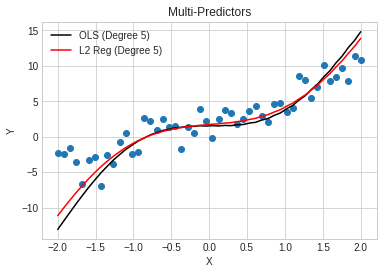

In [0]:
'''
plt.subplot(1, 2, 1)
plt.scatter(x, y)
# Chart title
plt.title('Ordinary Linear Regression')
# y-label
plt.ylabel('Y')
# x-label
plt.xlabel('X')
# Plot simple linear regression (degree 1)
simple, = plt.plot(X["Degree_1"], theta_ols[0] + theta_ols[1]*X["Degree_1"], 'y')
# Legend for simple linear regression scatter plot, plot on left
plt.legend([simple], ['Degree 1'])
'''
# Visualize multiple linear regression (degree 5) and L2 loss function (degree 5), figure on the right
##plt.subplot(1, 2, 2)
plt.scatter(x, y)
# Chart title
plt.title('Multi-Predictors')
# y-label
plt.ylabel('Y')
# x-label
plt.xlabel('X')
# Plot multiple linear regression (degree 5)
multiple, = (plt.plot(np.sort(X["Degree_1"]), theta_ols[0] + np.sort(X["Degree_1"])*theta_ols[1] 
         + np.sort(X["Degree_2"])*theta_ols[2] + np.sort(X["Degree_3"])*theta_ols[3] 
         + np.sort(X["Degree_5"])*theta_ols[4] + np.sort(X["Degree_5"])*theta_ols[5],'-k') )
# Plot ridge regression (L2 loss function with degree 5)
ridge, = (plt.plot(np.sort(X["Degree_1"]), theta_rid[0] + np.sort(X["Degree_1"])*theta_rid[1] 
         + np.sort(X["Degree_2"])*theta_rid[2] + np.sort(X["Degree_3"])*theta_rid[3] 
         + np.sort(X["Degree_5"])*theta_rid[4] + np.sort(X["Degree_5"])*theta_rid[5],'r') )
# Set legend for plot on the right
plt.legend([multiple, ridge], ['OLS (Degree 5)','L2 Reg (Degree 5)'])
# Show scatter plots
plt.show()

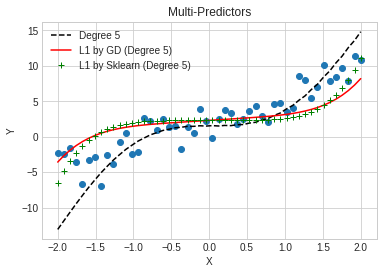

In [0]:
# Visualize multiple linear regression (degree 5) and L1 loss function (degree 5), figure on the right
plt.scatter(x, y)
# Chart title
plt.title('Multi-Predictors')
# y-label
plt.ylabel('Y')
# x-label
plt.xlabel('X')
# Plot multiple linear regression (degree 5)
multiple, = (plt.plot(np.sort(X["Degree_1"]), theta_ols[0] + np.sort(X["Degree_1"])*theta_ols[1] 
         + np.sort(X["Degree_2"])*theta_ols[2] + np.sort(X["Degree_3"])*theta_ols[3] 
         + np.sort(X["Degree_5"])*theta_ols[4] + np.sort(X["Degree_5"])*theta_ols[5],'--k') )
grad_lasso, = (plt.plot(np.sort(X["Degree_1"]), theta_lasso[0] + np.sort(X["Degree_1"])*theta_lasso[1] 
         + np.sort(X["Degree_2"])*theta_lasso[2] + np.sort(X["Degree_3"])*theta_lasso[3] 
         + np.sort(X["Degree_5"])*theta_lasso[4] + np.sort(X["Degree_5"])*theta_lasso[5],'r') )
model_lasso, = (plt.plot(np.sort(X["Degree_1"]), theta_lasso2[0] + np.sort(X["Degree_1"])*theta_lasso2[1] 
         + np.sort(X["Degree_2"])*theta_lasso2[2] + np.sort(X["Degree_3"])*theta_lasso2[3] 
         + np.sort(X["Degree_5"])*theta_lasso2[4] + np.sort(X["Degree_5"])*theta_lasso2[5],'+g') )
# Set legend for plot on the right
plt.legend([multiple, grad_lasso, model_lasso], ['Degree 5','L1 by GD (Degree 5)','L1 by Sklearn (Degree 5)'])
# Show scatter plots
plt.show()


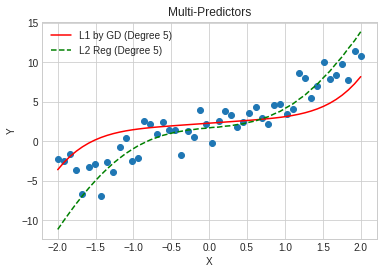

In [0]:
# Visualize multiple linear regression (degree 5) and L1 loss function (degree 5), figure on the right
plt.scatter(x, y)
# Chart title
plt.title('Multi-Predictors')
# y-label
plt.ylabel('Y')
# x-label
plt.xlabel('X')
grad_lasso, = (plt.plot(np.sort(X["Degree_1"]), theta_lasso[0] + np.sort(X["Degree_1"])*theta_lasso[1] 
         + np.sort(X["Degree_2"])*theta_lasso[2] + np.sort(X["Degree_3"])*theta_lasso[3] 
         + np.sort(X["Degree_5"])*theta_lasso[4] + np.sort(X["Degree_5"])*theta_lasso[5],'r') )
ridge, = (plt.plot(np.sort(X["Degree_1"]), theta_rid[0] + np.sort(X["Degree_1"])*theta_rid[1] 
         + np.sort(X["Degree_2"])*theta_rid[2] + np.sort(X["Degree_3"])*theta_rid[3] 
         + np.sort(X["Degree_5"])*theta_rid[4] + np.sort(X["Degree_5"])*theta_rid[5],'--g') )
# Set legend for plot on the right
plt.legend([grad_lasso, ridge], ['L1 by GD (Degree 5)','L2 Reg (Degree 5)'])
# Show scatter plots
plt.show()